# The comparison of tropical precipitation histograms for different data

# Structure

1. [Load of packages, modules and data](#1-load-of-packages-modules-and-data)

2. [Initialization of precipitation diagnostic and setting the class attributes](#2-initializing-the-class-object-and-setting-the-class-attributes)

3. [Calculation of histogram of tropical precipitation](#3-calculating-the-histograms-of-tropical-precipitation)
 
4. [Comparing the plots for different data](#4-comparing-the-plots-for-different-data)


## 1. Load of  packages, modules and data

In [1]:
import sys

from aqua import Reader, catalogue
from aqua.benchmark import graphic_creator, time_functions
sys.path.insert(0, '../')
from tropical_rainfall_class import TR_PR_Diagnostic as TR_PR_Diag
from aqua.benchmark.time_functions import time_interpreter as time_interpreter

In [4]:
from aqua.slurm import slurm

In [ ]:
slurm.job()

In [2]:
reader = Reader(model="ICON", exp="ngc2009", source="atm_2d_ml_R02B09", freq='1D', regrid="r100")
icon = reader.retrieve(regrid=True, timmean=True)
time_interpreter(icon)

'D'

In [6]:
reader = Reader(model="IFS", exp="tco2559-ng5", source="ICMGG_atm2d", freq='1D', regrid="r100")
ifs = reader.retrieve(regrid=True, timmean=True)
time_interpreter(ifs)

'D'

In [7]:
reader = Reader(model="MSWEP", exp="past", source="daily", regrid="r100")
mswep = reader.retrieve(regrid=True)
time_interpreter(mswep)

'D'

In [8]:
time_interpreter(mswep), time_interpreter(ifs), time_interpreter(icon)

('D', 'D', 'D')

## 2. Initializing the class object and setting the class attributes

In [9]:
diag = TR_PR_Diag(trop_lat=15, s_time = 10, f_time = 20, num_of_bins = 20, first_edge = 0, width_of_bin = 1*10**(-6)/15)

In [37]:
#ifs_chunk = ifs["tprate"][0:30,:]
#icon_chunk = icon["tprate"][0:30,:]
#mswep_chunk = mswep["tprate"][0:30,:]
ifs_chunk = ifs["tprate"].sel(time='2020-02')
icon_chunk = icon["tprate"].sel(time='2020-02')
mswep_chunk = mswep["tprate"].sel(time='2020-02')

In [38]:
ifs_chunk.time.size, icon_chunk.time.size,  mswep_chunk.time.size

(29, 29, 29)

## 3. Calculating the histograms of tropical precipitation

In [39]:
hist_icon = diag.histogram(icon_chunk)
hist_icon 

<xarray.Dataset>
Dimensions:         (left_edge: 20)
Coordinates:
  * left_edge       (left_edge) float64 0.0 6.667e-08 ... 1.2e-06 1.267e-06
    width           (left_edge) float64 6.667e-08 6.667e-08 ... 6.667e-08
Data variables:
    trop_counts     (left_edge) float64 4.893e+04 9.571e+03 ... 3.0 3.0
    trop_frequency  (left_edge) float64 0.6798 0.133 ... 4.168e-05 4.168e-05
    trop_pdf        (left_edge) float64 1.02e+07 1.995e+06 ... 625.2 625.2
Attributes: (12/16)
    CDI_grid_type:                unstructured
    cell_methods:                 t: mean
    long_name:                    Mean total precipitation rate
    number_of_grid_in_reference:  1
    param:                        52.1.0
    standard_name:                pr
    ...                           ...
    cfVarName:                    tprate
    shortName:                    tprate
    factor:                       0.001
    offset:                       0
    src_units:                    kg m-2 s-1
    units_fixed:                  1

In [40]:
hist_ifs  = diag.histogram(ifs_chunk)
hist_ifs

<xarray.Dataset>
Dimensions:         (left_edge: 20)
Coordinates:
  * left_edge       (left_edge) float64 0.0 6.667e-08 ... 1.2e-06 1.267e-06
    width           (left_edge) float64 6.667e-08 6.667e-08 ... 6.667e-08
Data variables:
    trop_counts     (left_edge) float64 2.519e+04 8.718e+03 ... 442.0 422.0
    trop_frequency  (left_edge) float64 0.4541 0.1572 ... 0.007968 0.007608
    trop_pdf        (left_edge) float64 6.812e+06 2.357e+06 ... 1.141e+05
Attributes: (12/23)
    paramId:                    172228
    dataType:                   fc
    numberOfPoints:             26306560
    typeOfLevel:                surface
    stepUnits:                  1
    stepType:                   instant
    ...                         ...
    long_name:                  Mean total precipitation rate
    factor:                     0.0002777777777777778
    offset:                     0
    decumulated:                1
    src_units:                  m
    units_fixed:                1

In [41]:
hist_mswep = diag.histogram(mswep_chunk)
hist_mswep 

<xarray.Dataset>
Dimensions:         (left_edge: 20)
Coordinates:
  * left_edge       (left_edge) float64 0.0 6.667e-08 ... 1.2e-06 1.267e-06
    width           (left_edge) float64 6.667e-08 6.667e-08 ... 6.667e-08
Data variables:
    trop_counts     (left_edge) float64 5.375e+04 8.498e+03 4.15e+03 ... 1.0 6.0
    trop_frequency  (left_edge) float64 0.7466 0.1181 ... 1.389e-05 8.335e-05
    trop_pdf        (left_edge) float64 1.12e+07 1.771e+06 ... 208.4 1.25e+03
Attributes:
    units:        m s**-1
    regridded:    1
    history:      2023-06-11 14:09:15 variable renamed by AQUA fixer;\n2023-0...
    paramId:      172228
    long_name:    Mean total precipitation rate
    cfVarName:    tprate
    shortName:    tprate
    factor:       1.1574074074074072e-08
    offset:       0
    src_units:    mm d-1
    units_fixed:  1

In [43]:
mswep_chunk.units, ifs_chunk.units, icon_chunk.units

('m s**-1', 'm s**-1', 'm s**-1')

## 4. Comparing the plots for different data

### Not that timestep for MSWEP highly different 

{<Axes: title={'center': 'Tropical prec'}, xlabel='Precipitation, m s**-1', ylabel='PDF'>,
 <Figure size 640x480 with 1 Axes>}

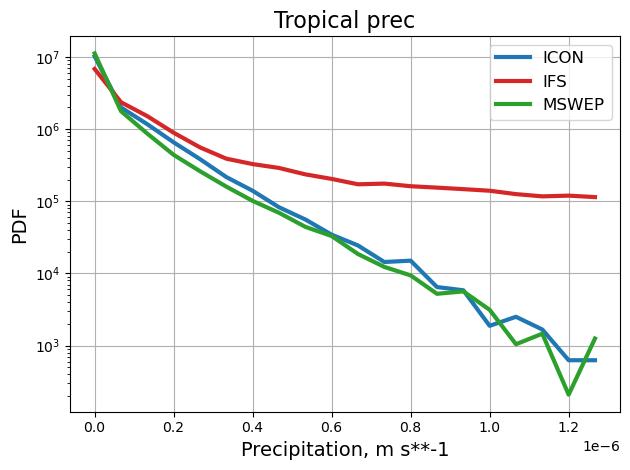

In [46]:
add = diag.hist_figure(hist_icon, pdf = True, smooth = True, label='ICON/ICON', save=False, plot_title = '', xlogscale = False)
diag.hist_figure(hist_ifs, pdf = True, smooth = True, add = add, color ='tab:red', label='IFS', save=False, 
                  xlogscale = False, 
                  plot_title = '') #"Trop precipitation rate comparison")
diag.hist_figure(hist_mswep, pdf = True, smooth = True, add = add, color ='tab:green', label='MSWEP',  xlogscale = False,
                 save=True, plot_title='Tropical prec')

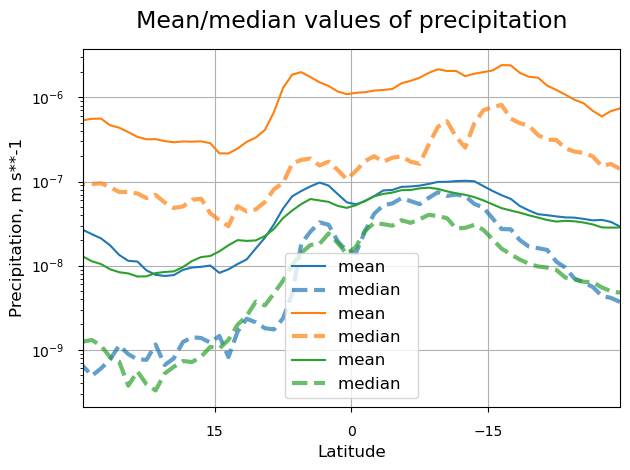

In [47]:
coord='lat'
trop_lat=30
add = diag.mean_and_median_plot(icon_chunk, coord =coord, trop_lat=trop_lat, #legend=' lat<30', 
                                savelabel = 'ICON/ICON',  color='tab:blue',  highlight_seasons=False)
diag.mean_and_median_plot(ifs_chunk, coord =coord, trop_lat=trop_lat, #legend=' lat<30',  
                          add=add, 
                          savelabel = 'ICON/ICON', color='tab:orange', highlight_seasons=False)
diag.mean_and_median_plot(mswep_chunk, coord =coord, trop_lat=trop_lat, #legend=' lat<90',  
                          add=add, 
                          savelabel = 'ICON/ICON', color='tab:green', highlight_seasons=False)

In [48]:
coord='lon'
trop_lat=30
add = diag.mean_and_median_plot(icon_chunk, coord =coord, trop_lat=trop_lat, legend=' icon', 
                                savelabel = 'ICON/ICON',  color='tab:blue',  highlight_seasons=False)
diag.mean_and_median_plot(ifs_chunk, coord =coord, trop_lat=trop_lat, legend=' ifs',  
                          add=add, 
                          savelabel = 'ICON/ICON', color='tab:orange', highlight_seasons=False)
diag.mean_and_median_plot(mswep_chunk, coord =coord, trop_lat=trop_lat, legend=' mswep',  
                          add=add, 
                          savelabel = 'ICON/ICON', color='tab:green', highlight_seasons=False)

{<Axes: title={'center': 'Tropical prec'}, xlabel='Precipitation, m s**-1', ylabel='PDF'>,
 <Figure size 640x480 with 1 Axes>}

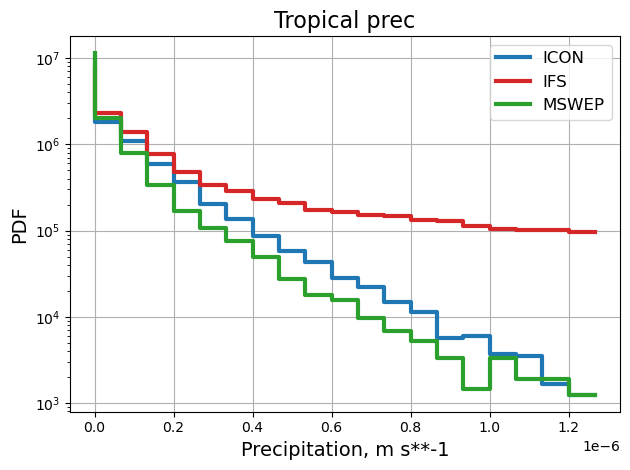

In [22]:
add = diag.hist_figure(hist_icon, pdf = True, step = True, smooth = False, label='ICON/ICON', save=False, plot_title = '')
diag.hist_figure(hist_ifs, pdf = True, step = True, smooth = False, add = add, color ='tab:red', label='IFS', save=False, 
                 plot_title = '') #"Trop precipitation rate comparison")
diag.hist_figure(hist_mswep, pdf = True, step = True,  smooth = False, add = add, color ='tab:green', label='MSWEP', save=True, plot_title='Tropical prec')

In [23]:
hist_ifs

<xarray.Dataset>
Dimensions:         (left_edge: 20)
Coordinates:
  * left_edge       (left_edge) float64 0.0 6.667e-08 ... 1.2e-06 1.267e-06
    width           (left_edge) float64 6.667e-08 6.667e-08 ... 6.667e-08
Data variables:
    trop_counts     (left_edge) float64 2.539e+04 7.737e+03 ... 341.0 326.0
    trop_frequency  (left_edge) float64 0.5041 0.1536 ... 0.00677 0.006472
    trop_pdf        (left_edge) float64 7.561e+06 2.304e+06 ... 9.708e+04
Attributes: (12/23)
    paramId:                    172228
    dataType:                   fc
    numberOfPoints:             26306560
    typeOfLevel:                surface
    stepUnits:                  1
    stepType:                   instant
    ...                         ...
    long_name:                  Mean total precipitation rate
    factor:                     0.0002777777777777778
    offset:                     0
    decumulated:                1
    src_units:                  m
    units_fixed:                1

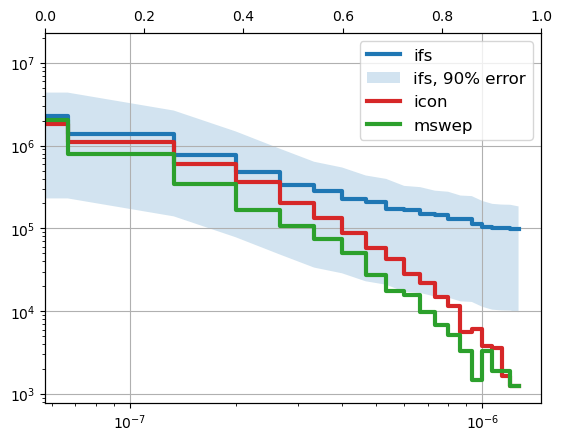

In [25]:
import matplotlib.pyplot as plt

data = hist_ifs['trop_pdf']
alpha = 0.9
data1= data[:]*(1+alpha)
data2= data[:]*(1-alpha)


fig, ax =  plt.subplots( ) 
ax2=ax.twiny()
# make a plot with different y-axis using second axis object
ax.step(data.left_edge, data, 
                linewidth=3.0, ls = '-', color = 'tab:blue', label =  'ifs' )
ax.fill_between(data.left_edge, data1, data2, alpha=0.2, label = 'ifs, 90% error')
data = hist_icon['trop_pdf']
ax.step(data.left_edge, data, 
                linewidth=3.0, ls = '-', color = 'tab:red', label =  'icon' )
data = hist_mswep['trop_pdf']
ax.step(data.left_edge, data, 
                linewidth=3.0, ls = '-', color = 'tab:green', label =  'mswep' )
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(fontsize=12)
ax.grid(True)

In [9]:
def credibility(data_1, data_2, alpha=0.9):
    bool = True
    while alpha > 0 and bool==True:
        for i in range(0, len(data_1)):
            if data_2[i]<data_1[i]*(1-alpha) or data_2[i]>data_1[i]*(1+alpha):
                bool=False
                break
        if bool: alpha=alpha-0.1
    return alpha

In [11]:
credibility(data_1=hist_ifs, data_2=hist_icon, alpha=0.9)

0.40000000000000013

In [12]:
credibility(data_1=hist_ifs, data_2=hist_mswep, alpha=0.9)

0.9

In [19]:
from scipy.stats import ttest_ind
data1, data2 = hist_ifs, hist_icon
data3 = hist_mswep 

stat, p = ttest_ind(data2, data3)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
 print('Same distributions (fail to reject H0)')
else:
 print('Different distributions (reject H0)')

Statistics=-0.007, p=0.994
Same distributions (fail to reject H0)


In [20]:
from scipy.stats import f_oneway
stat, p = f_oneway(data1, data2 )
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
 print('Probably different distributions')

stat=0.000, p=0.995
Probably the same distribution


In [ ]:
import numpy as np 
from scipy.stats import t

x = hist_ifs
m = x.mean() 
s = x.std() 
dof = len(x)-1 
confidence = 0.95

t_crit = np.abs(t.ppf((1-confidence)/2,dof))

t_crit

m-s*t_crit/np.sqrt(len(x)), m+s*t_crit/np.sqrt(len(x))